<a href="https://colab.research.google.com/github/amirali200080/color_recognization/blob/Simple-Practice---without-adding-noises/Simple_without_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os

If there is such folder, we don't want it, and we can remove that tree(directory and subdirectories) by running following code:

In [42]:
import shutil
try:
  shutil.rmtree("datas")
except:
  pass

Here we can list the colors and theyre RGB codes:

In [43]:
colors = dict()
colors["red"] = (0, 0, 255)
colors["green"] = (0, 255, 0)
colors["blue"] = (255, 0, 0)
colors["white"] = (255, 255, 255)
colors["black"] = (0, 0, 0)
colors["brown"] = (51, 64, 92)
colors["orange"] = (0, 195, 255)
colors["yellow"] = (0, 255, 255)

here we are going to make directories(folders):

In [44]:
list_of_directories = [f"datas/{i}" for i in colors.keys()]
for i in list_of_directories:
  try:
    os.makedirs(i)
  except:
    pass
os.listdir()

['.config', 'datas', 'sample_data']

In [45]:
whiteblankimage = 255 * np.ones(shape=[512, 512, 3], dtype=np.uint8)
for color, RGB_Code in colors.items():
  cv2.rectangle(whiteblankimage, pt1=(0,0), pt2=(512, 512), color=RGB_Code, thickness=-1)
  for i in range(100):
    cv2.imwrite(f"datas/{color}/{i}.jpg", whiteblankimage)

#plt.imshow(whiteblankimage)

#plt.show()


In [46]:
directory = "datas/"

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    validation_split=0.2,
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    validation_split=0.2,
    seed=123
)

Found 800 files belonging to 8 classes.
Using 640 files for training.
Found 800 files belonging to 8 classes.
Using 160 files for validation.


In [ ]:
#tf.keras.utils.load_img(
 #   "/content/datas/green/1.jpg",
 #   grayscale=False,
 #   color_mode="rgb",
 #   target_size=None,
 #   interpolation="nearest",
 #   keep_aspect_ratio=False,
#)


In [47]:
class_names = train_ds.class_names
print(class_names)

['black', 'blue', 'brown', 'green', 'orange', 'red', 'white', 'yellow']


In [ ]:
#print ((list(val_ds.take(1))[0][0][0]))

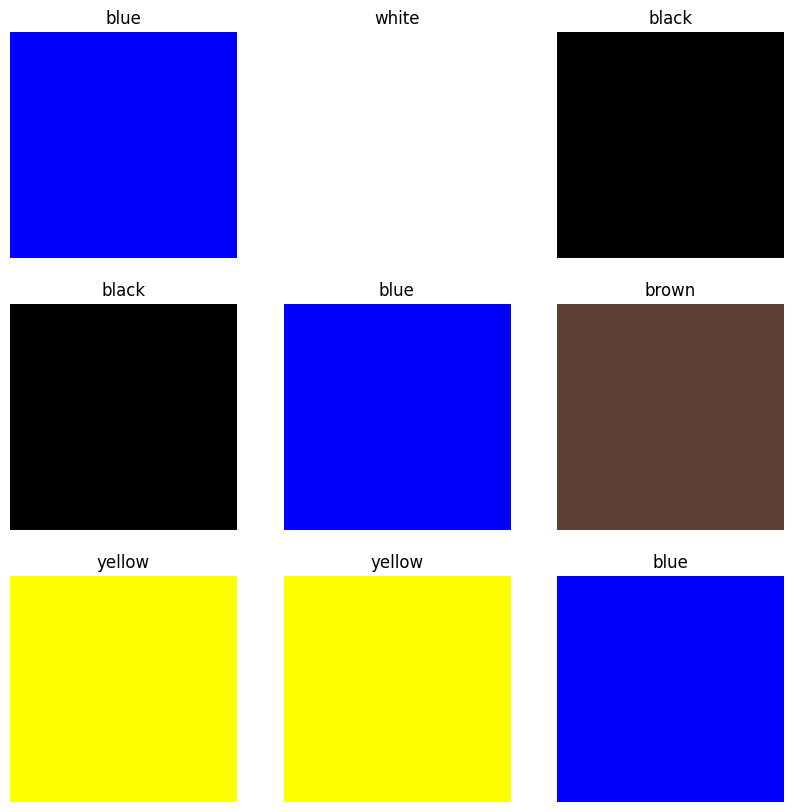

In [48]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [49]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [50]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [51]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.0


In [52]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
20/20 [==============================] - 38s 2s/step - loss: 0.9325 - accuracy: 0.7453 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 45s 2s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 5.0032e-05 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 35s 2s/step - loss: 5.0038e-05 - accuracy: 1.0000 - val_loss: 2.1657e-05 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 37s 2s/step - loss: 1.7896e-05 - accuracy: 1.0000 - val_loss: 8.3996e-06 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 36s 2s/step - loss: 8.2929e-06 - accuracy: 1.0000 - val_loss: 5.1908e-06 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 37s 2s/step - loss: 5.7423e-06 - accuracy: 1.0000 - val_loss: 4.0337e-06 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 37s 2s/step - loss: 4.6070e-06 - accuracy: 1.0000 - val_loss: 3.3475e-06

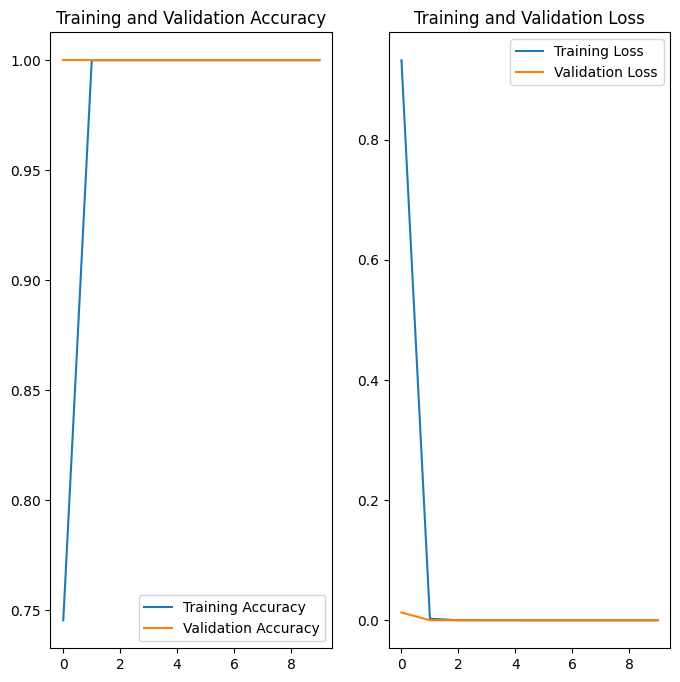

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

19159/19159 [==============================] - 0s 0us/step


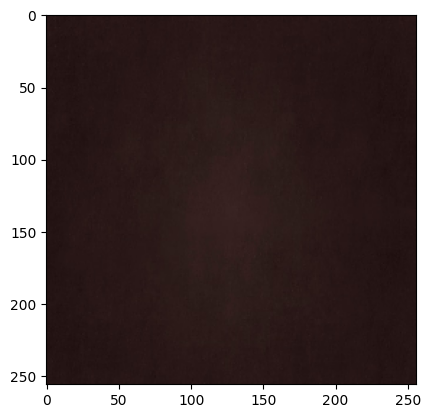

1/1 [==============================] - 0s 41ms/step
This image most likely belongs to brown with a 98.91 percent confidence.


In [60]:
#img = cv2.rectangle(whiteblankimage, pt1=(0,0), pt2=(512, 512), color=(0,0,255), thickness=-1)
#sunflower_url = "https://htmlcolorcodes.com/assets/images/colors/baby-blue-color-solid-background-1920x1080.png"
#sunflower_path = tf.keras.utils.get_file('Blue', origin=sunflower_url)

#color_url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAAC3CAMAAAAGjUrGAAAAG1BMVEX/AAD/i47IAAT/PUHcAAX/kJP/NTn/QETZAAUkBiP4AAABAUlEQVR4nO3QSQ0AIBAEsOXGv2I8zI+kldBqkbVH4lTmzkjPlBMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnTpw4ceLEiRMnH5489COT89vAjEAAAAAASUVORK5CYII="
#color_path = tf.keras.utils.get_file('Red', origin=color_url)

color_url = "https://img.freepik.com/free-photo/solid-brown-concrete-textured-wall_53876-124585.jpg"
color_path = tf.keras.utils.get_file('darkBrown', origin=color_url)



img = tf.keras.utils.load_img(
    color_path, target_size=(256, 256)
)
plt.imshow(img)
plt.show()
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
#img_array = img_array.reshape((1, 28, 28))

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
#del img2
del sunflower_path
del sunflower_url
del img